# Introduction

In this notebook, we will be using the KS solver for Case 1.


In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt

# Add the directory containing your module to sys.path
davinci_path = os.path.abspath(os.path.join('..', r"A:\daVinci" ))
sys.path.append(davinci_path)
from daVinci import *

from ks_solver import *


# Setup

For this case, we will use the following ratios to determine the data. First is CFL which handles stability in the solve for the advective condition. Second is the signal to noise ratio for the initial values.


In [2]:
CFL = 0.1
SNR = 0.01


Second, we can set up the coefficients for the calculation.


In [3]:
alpha1 = -100e-6
gamma1 = 1e-6


Next, we will set up the domain for space and time.


In [4]:
x = np.linspace( -2 * np.pi , 2 * np.pi , num=1000 )
t_bounds = (0,6)

Now, let's initialize the function.


In [5]:
L = np.max( x ) - np.min( x )
u_0 = - np.sin( x )
u_0 = u_0 + SNR * np.max(u_0) * np.random.rand( len(x) ) 

Text(0.5, 1.0, 'Initialized Values for u')

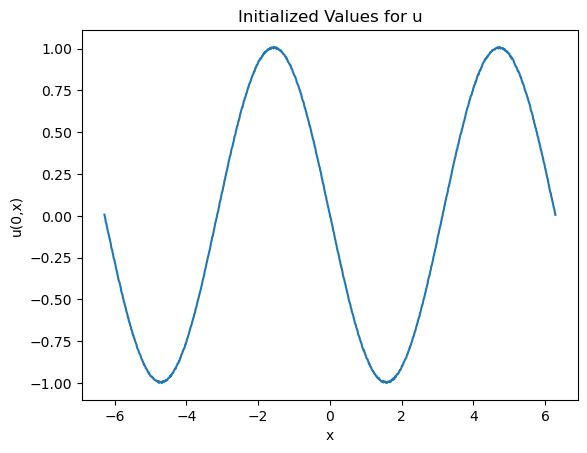

In [6]:
plt.plot( x , u_0 )
plt.xlabel("x")
plt.ylabel("u(0,x)")
plt.title("Initialized Values for u")


In [7]:
dt = CFL * np.mean( np.gradient( x ) ) / np.max( u_0 )

ks_case1 = KS( x , u_0 , t_bounds , dt , alpha=alpha1 , gamma=gamma1 )


In [8]:
ks_case1.solve( n_xOrder=6 , n_tOrder=4 , bc_xOrder=5 , bc_dudx=(1,-1) )#, bc_dudx=(None,None) , bc_d2udx2=(0,0) )


RK4 time stepping selected.
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:203: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using <= is inefficient, try using > instead.
  cls.A_advect[np.abs(cls.A_advect)*cls.dx<=zero_tol]=0
a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:456: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u[i+1,:] = spsr.linalg.spsolve( cls.D , cls.phi[i,:] )
a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:470: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u_1[i,:] = spsr.linalg.spsolve( cls.D , cls.phi_1[i,:] )
a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:483: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u_2[i,:] = spsr.linalg.spsolve( cls.D , cls.phi_2[i,:] )
a:\Users\mtthl\Documents\Education\ME5653_CF

Hello there


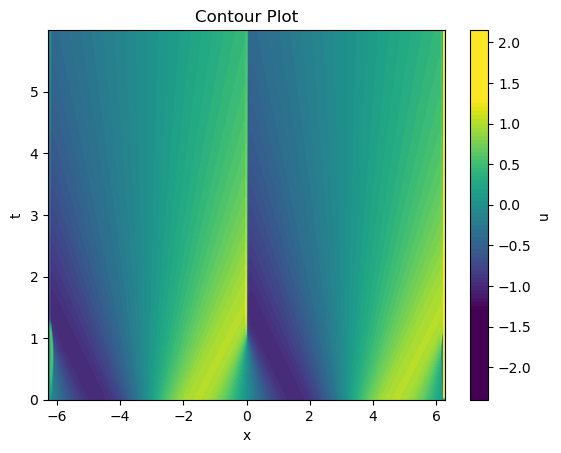

In [9]:
x = ks_case1.x
y = ks_case1.t
X , Y = np.meshgrid( x , y )
Z = ks_case1.u

# Set the limits for the color scale
contour = plt.contourf(X, Y, Z, levels=100, cmap='viridis', vmin=-1.3, vmax=1.3 )

# Add a colorbar
cbar = plt.colorbar(contour)
cbar.set_label('u')

# Add axis labels
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour Plot')

plt.show()


# Data Interpretation 

Another way to work through the data is to look at the spectral domain. To do this, we will import some objects from Project da Vinci.



In [10]:
spectral_case1 = SpectralData( { "case1" : ks_case1.u.T } , dt = ks_case1.dx , fft_method="real" )


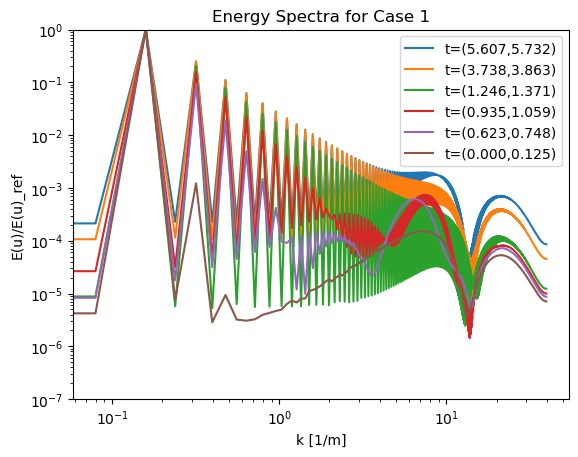

In [11]:
t_span = 100
starting_points = [0 , 500 , 750 , 1000 , 3000 , 4500 ]

for i , t in enumerate( starting_points[::-1] ):
    t_start = t
    t_end = t_start + t_span
    x = spectral_case1.frequency_data["case1"]
    y = np.mean( spectral_case1.energy_spectra["case1"].T[t_start:t_end] , axis=0 ) / np.mean( spectral_case1.energy_spectra["case1"].T[t_start:t_end] , axis=0 )[2]

    plt.loglog( x , y , label = f"t=({ks_case1.t[t_start]:.3f},{ks_case1.t[t_end]:.3f})" )

plt.title("Energy Spectra for Case 1")
plt.xlabel("k [1/m]")
plt.ylabel("E(u)/E(u)_ref")
plt.ylim((1e-7,1))
plt.legend( loc="best" )



In [39]:
integral_length_scale = np.trapz( np.sqrt(spectral_case1.energy_spectra["case1"].T[:,:]) , x=(spectral_case1.frequency_data["case1"][:]) ) / np.sqrt( spectral_case1.energy_spectra["case1"][2,:].T )


C:\Users\mtthl\AppData\Local\Temp\ipykernel_12076\538127332.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral_length_scale = np.trapz( np.sqrt(spectral_case1.energy_spectra["case1"].T[:,:]) , x=(spectral_case1.frequency_data["case1"][:]) ) / np.sqrt( spectral_case1.energy_spectra["case1"][2,:].T )


In [40]:
integral_length_scale


array([0.08706822, 0.20008418, 0.20147216, ..., 1.15197093, 1.15212223,
       1.15227353])

Text(0.5, 1.0, 'Integral Length Scale Along Time')

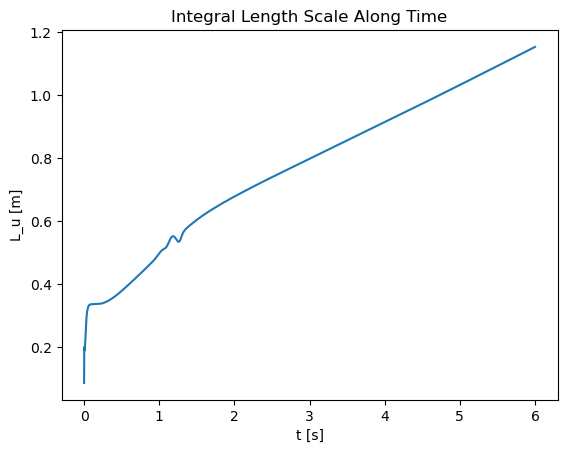

In [41]:
plt.plot( ks_case1.t , integral_length_scale )
plt.xlabel("t [s]")
plt.ylabel("L_u [m]")
plt.title("Integral Length Scale Along Time")



In [14]:
spectral_case1.correlations()


# Regime

One point of interest is the non-dimensional 


In [15]:
Re_cell_max = np.max( np.abs( ks_case1.u ) , axis=-1 ) * ks_case1.dx / -ks_case1.alpha
Re_cell_max


array([126.98769753, 126.84501122, 126.74718458, ..., 263.67142853,
       263.67031363, 263.66920192])

In [16]:
Re_cell_min = np.min( np.abs( ks_case1.u ) , axis=-1 ) * ks_case1.dx / -ks_case1.alpha
Re_cell_min


array([0.1175345 , 0.17141581, 0.19816294, ..., 0.0343402 , 0.0343341 ,
       0.03432801])

In [17]:
Re_Lu_max = np.max( ks_case1.u , axis=-1 ) * integral_length_scale / -ks_case1.alpha
Re_Lu_max


array([  878.9758095 ,  2017.63112891,  2030.06057429, ...,
       20029.68850916, 20032.01596412, 20034.34366723])

In [18]:
Re_Lu_min = np.min( np.abs( ks_case1.u ) , axis=-1 ) * integral_length_scale / -ks_case1.alpha
Re_Lu_min


array([0.81354323, 2.72658638, 3.1738991 , ..., 3.14485044, 3.1447049 ,
       3.14455941])

In [19]:
NS_max = 2*( ks_case1.gamma / ( integral_length_scale**2 ) ) * np.max( np.gradient( ks_case1.u , axis=-1 ) , axis=-1 )
NS_max


array([4.51403086e-06, 7.71520293e-07, 9.97455443e-07, ...,
       1.28405262e-06, 1.28376227e-06, 1.28347202e-06])

In [20]:
NS_min = 2*( ks_case1.gamma / ( integral_length_scale**2 ) ) * np.min( np.abs( np.gradient( ks_case1.u , axis=-1 ) ) , axis=-1 )
NS_min


array([5.98155279e-09, 8.66411787e-10, 7.22614056e-10, ...,
       2.65940718e-10, 2.66102841e-10, 2.65682619e-10])

Text(0.5, 1.0, 'Comparison of Re_cell Bounds Throughout Time\n')

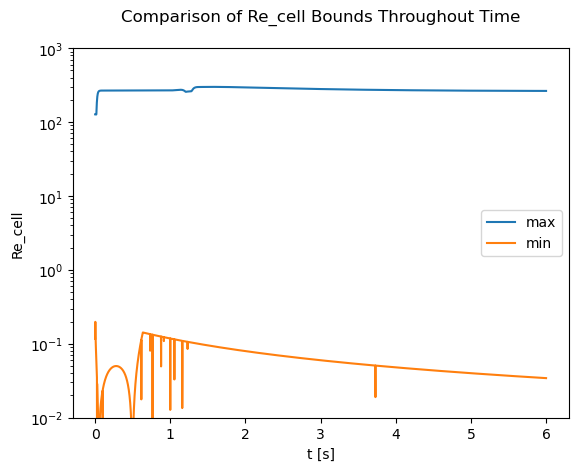

In [44]:
plt.semilogy( ks_case1.t , Re_cell_max , label="max" )
plt.semilogy( ks_case1.t , Re_cell_min , label="min" )
plt.xlabel("t [s]")
plt.ylabel("Re_cell")
plt.ylim((1e-2,1e3))
plt.legend(loc = "best" )
plt.title("Comparison of Re_cell Bounds Throughout Time\n")


Text(0.5, 1.0, 'Comparison of Re_Lu Bounds Throughout Time\n')

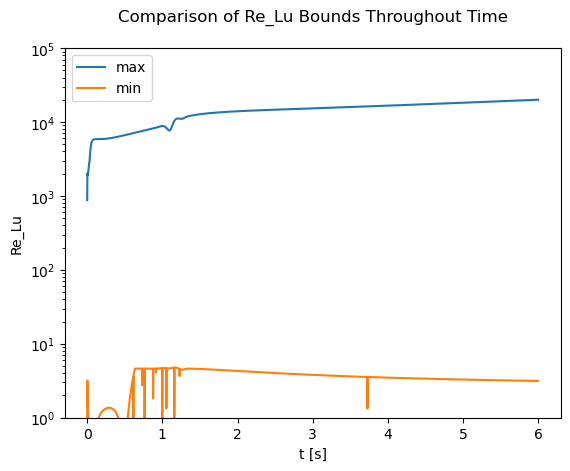

In [42]:
plt.semilogy( ks_case1.t , Re_Lu_max , label="max" )
plt.semilogy( ks_case1.t , Re_Lu_min , label="min" )
plt.xlabel("t [s]")
plt.ylabel("Re_Lu")
plt.ylim((1,1e5))
plt.legend(loc = "best" )
plt.title("Comparison of Re_Lu Bounds Throughout Time\n")


Text(0.5, 1.0, 'Comparison of Nondimensional Stiffness Bounds Throughout Time\n')

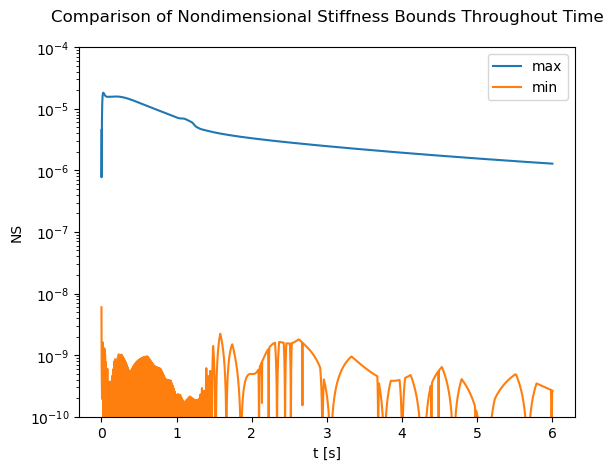

In [ ]:
plt.semilogy( ks_case1.t , NS_max , label="max" )
plt.semilogy( ks_case1.t , NS_min , label="min" )
plt.xlabel("t [s]")
plt.ylabel("NS")
plt.ylim((1e-10,1e-4))
plt.legend(loc = "best" )
plt.title("Comparison of Nondimensional Stiffness Bounds Throughout Time\n")
